# CREDIT CARD FRAUD DETECTION

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# IMPORT LIBRARIES

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score,
                            precision_score, recall_score,
                            f1_score, matthews_corrcoef,
                            confusion_matrix)

# LOAD AND PREPARE DATA

In [3]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Number of rows and cols
credit.shape

(284807, 31)

In [5]:
# Descriptive statistical measures of the dataset
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# EXPLORATORY DATA ANALYSIS

In [6]:
# Determine number of fraud cases in the dataset
fraud = credit[credit['Class'] == 1]
valid = credit[credit['Class'] == 0]
fraction = len(fraud)/float(len(valid))

print(fraction)
print("Fraud Cases: {}".format(len(credit[credit['Class'] == 1])))
print("Valid Cases: {}".format(len(credit[credit['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


* Only **0.17%** fraudulent transaction out all the transactions. The data is highly **Unbalanced**.

In [8]:
# Print the amount of details for Fraudulent Transaction
print("Amount of details for the Fraudulent Transaction")
fraud.Amount.describe()

Amount of details for the Fraudulent Transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
# Print the amount of details for Normal Transaction
print("Amount of details for Normal Transaction")
valid.Amount.describe()

Amount of details for Normal Transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

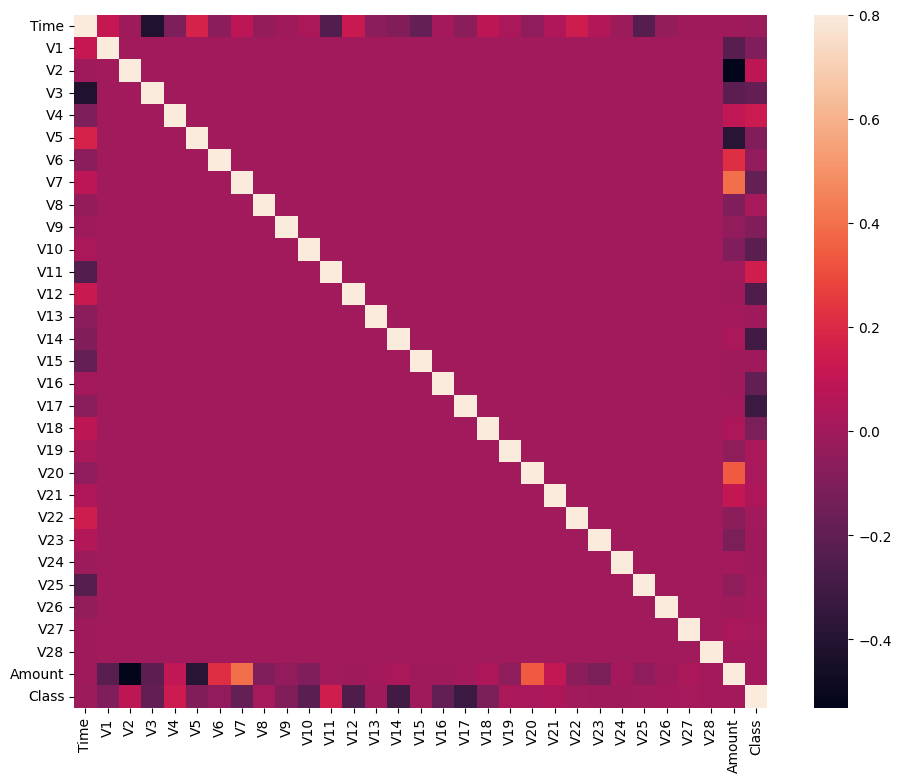

In [10]:
# Plotting the Correlation Matrix
corrmat = credit.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# MODEL DEVELOPMENT

In [12]:
# dividing X and Y from the dataset
X = credit.drop(['Class'], axis=1 )
Y = credit['Class']

print(X.shape)
print(Y.shape)

X_credit = X.values
Y_credit = Y.values

(284807, 30)
(284807,)


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

Above code will take 6m-52 seconds to excecute the above code


# MODEL EVALUATION

In [14]:
# Evaluating the classifier
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is RandomForestClassifier")

acc = accuracy_score(y_test, y_pred)
print(f"The accuracy is {acc}")

prec = precision_score(y_test, y_pred)
print(f"The precision score is {prec}")

rec = recall_score(y_test, y_pred)
print(f"The recall score is {rec}")

f1 = f1_score(y_test, y_pred)
print(f"The f1 score is {f1}")

MCC = matthews_corrcoef(y_test, y_pred)
print(f"The Matthews correlation coeficient is {MCC}")

The model used is RandomForestClassifier
The accuracy is 0.9995786664794073
The precision score is 0.9743589743589743
The recall score is 0.7755102040816326
The f1 score is 0.8636363636363636
The Matthews correlation coeficient is 0.8690748763736589


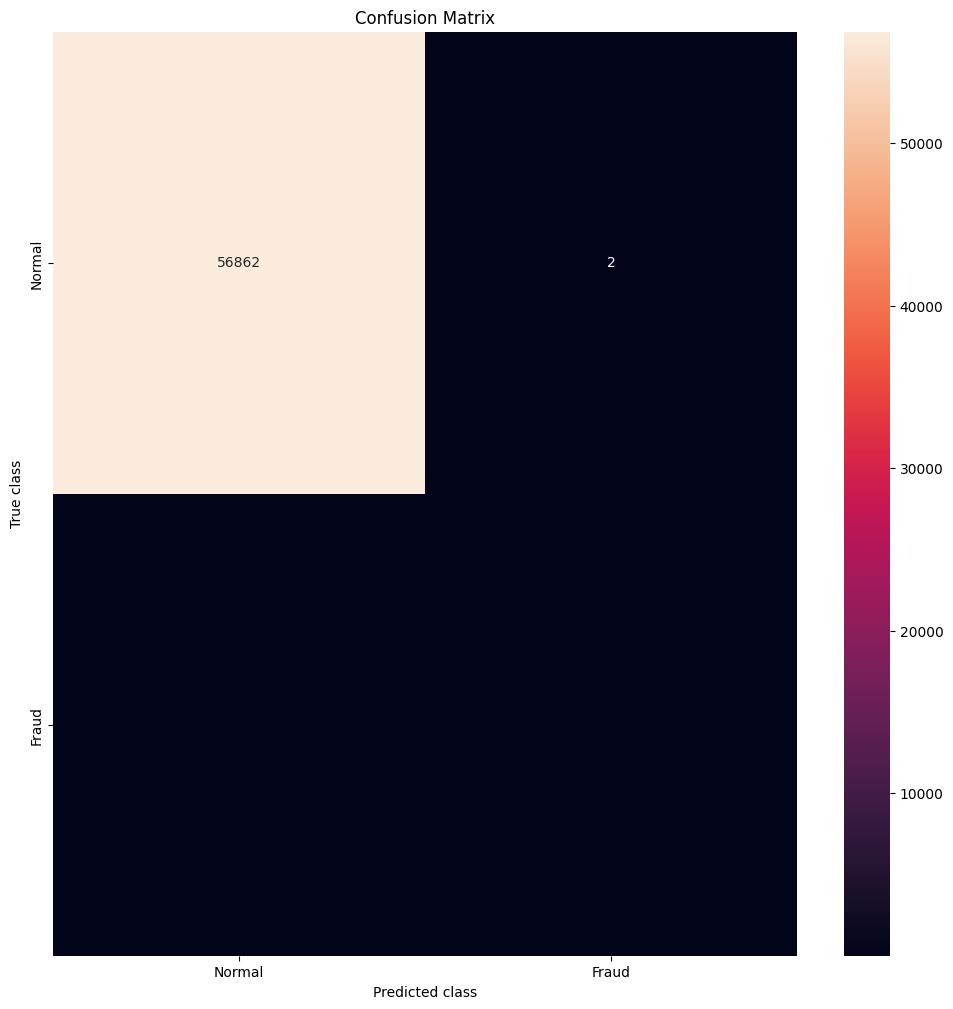

In [15]:
# Vizualize the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()